## Lecture-03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

### Part I Review the online programming. 

### Part 2: change loss function from $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ to $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, and using your mathmatical knowledge to get the right partial formual. Implemen the gradient descent code.

In [21]:
# 数据采集
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

data = load_boston()
X, y = data['data'], data['target']
X_rm = X[:, 5]
feature = data['feature_names']

In [15]:
def price(rm, k, b):
    return rm * k + b

def mae(prediction, y):
    return sum(abs(y1 - y2) for y1, y2 in zip(list(prediction), list(y))) / len(y)

In [23]:
def gd(X_rm, y, loss, trying_times):
    ans = []
    min_loss = float('inf')
    current_k = random.random() * 200 - 100
    current_b = random.random() * 200 - 100
    best_k = 0
    best_b = 0
    scalar = 0.001
    for i in range(trying_times):
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss(y, price_by_k_and_b)
        if current_loss < min_loss:
            best_k = current_k
            best_b = current_b
            min_loss = current_loss
            ans.append(min_loss)
            print('When time is : {}, get_best k is : {}, get_best b is : {}, and loss is : {}'.format(i, best_k, best_b, min_loss))
        current_k = current_k - scalar * sum([price(r, current_k, current_b) * r for r in X_rm]) / len(y)
        current_b = current_b - scalar * 2 * sum([price(r, current_k, current_b) for r in X_rm]) / len(y)
    return ans

In [24]:
loss = gd(X_rm, y, mae, 2000)

When time is : 0, get_best k is : 22.3303175966806, get_best b is : 81.07893178383537, and loss is : 198.88400730831037
When time is : 1, get_best k is : 20.92779183513389, get_best b is : 80.65372687983086, and loss is : 189.64444077414237
When time is : 2, get_best k is : 19.58402438888524, get_best b is : 80.24626255983695, and loss is : 180.7918893528505
When time is : 3, get_best k is : 18.296554059507002, get_best b is : 79.85579572909243, and loss is : 172.3101422174003
When time is : 4, get_best k is : 17.06302274031323, get_best b is : 79.48161441870238, and loss is : 164.1836675605297
When time is : 5, get_best k is : 15.881171098175882, get_best b is : 79.12303648187495, and loss is : 156.39758415277768
When time is : 6, get_best k is : 14.74883443621594, get_best b is : 78.7794083447688, and loss is : 148.93763409185885
When time is : 7, get_best k is : 13.663938729793172, get_best b is : 78.4501038096634, and loss is : 141.79015669347876
When time is : 8, get_best k is : 1

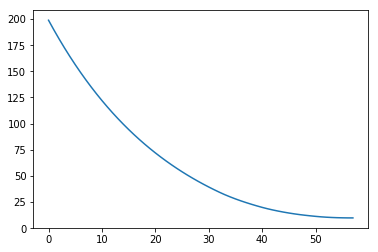

In [25]:
plt.plot([i for i in range(len(loss))], loss)

### Part 3: Finish the Solution Parse Part of Edit-Distance

In [36]:
from functools import wraps

In [162]:
solution = {}

In [163]:
def lru_cache(f):
    cache = {}
    @wraps(f)
    def _wrap(string1, string2):
        result = None
        if (string1, string2) in cache:
            result = cache[(string1, string2)]
        else:
            result = f(string1, string2)
            cache[(string1, string2)] = result
        return result
    return _wrap
        

In [164]:
@lru_cache
def edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))

    candidates.append(both_forward)
    
    min_distance, operation = min(candidates, key=lambda x: x[0])
    
    if min_distance != 0:
        solution[(string1, string2)] = operation 
    
    return min_distance

In [165]:
edit_distance('abcde', 'acfdedfg')

5

In [166]:
solution

{('a', 'ac'): 'ADD c',
 ('a', 'acf'): 'ADD f',
 ('a', 'acfd'): 'ADD d',
 ('a', 'acfde'): 'ADD e',
 ('a', 'acfded'): 'ADD d',
 ('a', 'acfdedf'): 'ADD f',
 ('a', 'acfdedfg'): 'ADD g',
 ('ab', 'a'): 'DEL b',
 ('ab', 'ac'): 'SUB b => c',
 ('ab', 'acf'): 'ADD f',
 ('ab', 'acfd'): 'ADD d',
 ('ab', 'acfde'): 'ADD e',
 ('ab', 'acfded'): 'ADD d',
 ('ab', 'acfdedf'): 'ADD f',
 ('ab', 'acfdedfg'): 'ADD g',
 ('abc', 'a'): 'DEL c',
 ('abc', 'ac'): '',
 ('abc', 'acf'): 'ADD f',
 ('abc', 'acfd'): 'ADD d',
 ('abc', 'acfde'): 'ADD e',
 ('abc', 'acfded'): 'ADD d',
 ('abc', 'acfdedf'): 'ADD f',
 ('abc', 'acfdedfg'): 'ADD g',
 ('abcd', 'a'): 'DEL d',
 ('abcd', 'ac'): 'DEL d',
 ('abcd', 'acf'): 'SUB d => f',
 ('abcd', 'acfd'): '',
 ('abcd', 'acfde'): 'ADD e',
 ('abcd', 'acfded'): 'ADD d',
 ('abcd', 'acfdedf'): 'ADD f',
 ('abcd', 'acfdedfg'): 'ADD g',
 ('abcde', 'a'): 'DEL e',
 ('abcde', 'ac'): 'DEL e',
 ('abcde', 'acf'): 'DEL e',
 ('abcde', 'acfd'): 'DEL e',
 ('abcde', 'acfde'): '',
 ('abcde', 'acfded'): '

In [190]:
def print_solution(solution):
    start = max(solution, key=lambda x: len(x[0]) + len(x[1]))
    s1 = start[0]
    s2 = start[1]
    es1 = s1
    es2 = s2
    print('({}, {}): start'.format(s1, s2))
    while start in solution:
        action = solution[start]
        if 'ADD' in action:
            letter = action.split(' ')[-1]
            s1 = s1[:len(es1)] + letter + s1[len(es1):]
            print('({}, {}): ADD {}'.format(s1, s2,letter))
            es2 = es2[:-1]
        elif 'DEL' in action:
            letter = action.split(' ')[-1]
            s1 = s1[:len(es1)-1] + s1[len(es1):]
            print('({}, {}): DEL {}'.format(s1, s2, letter))
            es1 = es1[:-1]
        elif 'SUB' in action:
            s1 = es1[:-1] + es2[-1] + s1[len(es1):]
            print('({}, {}): SUB {} => {}'.format(s1, s2, es1[-1], es2[-1]))
            es1 = es1[:-1]
            es2 = es2[:-1]
        else:
            es1 = es1[:-1]
            es2 = es2[:-1]
        start = (es1, es2)
            
            

In [191]:
print_solution(solution)

(abcde, acfdedfg): start
(abcdeg, acfdedfg): ADD g
(abcdefg, acfdedfg): ADD f
(abcdedfg, acfdedfg): ADD d
(abcfdedfg, acfdedfg): ADD f
(acfdedfg, acfdedfg): DEL b


### Part 4 Choose 1 - 2 books to keep reading: 

+ SICP, Structure and Interpretation of Computer Programming. 
+ Introduction to Algorithms 
+ Artificial Intelligence A Modern Approach (3rd Edition) 
+ Code Complete 2 
+ Programming Pearls 
+ Deep Learning
+ 黑客与画家
+ 数学之美
+ Fluent Python
+ Hands on Tensorflow
+ Conference: NIPS_ ICML_ ICLR_ ACL_ AAAI

> most books you may find in our github: https://github.com/Computing-Intelligence/References

## Part 5-1: review machine learning

1. Why do we use Derivative / Gradient to fit a target function?¶

Ans: 导数提供函数变小的信息

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度是函数对变量的导数，下降是变量沿着这个梯度的方向变化


3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:调整参数的大小和方向都是依赖于损失函数对变量的导数，使得优化速度更快

4. Using the simple words to describe: What's the machine leanring.¶

Ans: 通过数据，机器自己学出一个目标函数，该函数可以用来预测、分类等

### Part 5: Answer following questions: 

1. Why do we need dynamic programming? What's the difference of dynamic programming and previous talked `search` problem? 

如果一个函数的值$f(n)$是依赖于n-1.n-2...，那么可以将$f(n-1),f(n-2)...$的值存储下来，之后直接调用，节省了重复的计算时间。


2. Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the `right` answer based on inputs?

对于某些特定问题，目标函数的形势比较简单，那么使用dp会比ml更加快，并且不依赖于数据量的多少。同时，dp的递推关系是精准的，而ml学到的函数有些情况是不可控或者不精准的的。

3. Can you catch up at least 3 problems which could solved by Dynamic Programming? 

求两个字符串的最长公共子串；背包问题；Fibonacci数列

4. Can you catch up at least 3 problems wich could solved by Edit Distance? 

翻译效果评测；spell correction；语音翻译评价

5. Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature. 

面对的问题可以找到关于n的递推关系式；对于特定的n，问题解法比较容易；一般需要较大的存储空间

6. What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

需要存储之前的许多数据，耗费存储空间

## Part 6 Preparation of Project-01

1. Using python Flask or Bottle to finish your first simple web app:
> https://bottlepy.org/

2. Learn what's the SQL, and try some simple SQL operations:
> https://www.w3schools.com/sql/sql_intro.asp

3. Learn what's the HTML ( *ONLY* need to know the basic things)
> https://getbootstrap.com/; https://www.w3schools.com/html/

### (Optinal) Finish the k-person-salesman problem:

In [7]:
import random
import matplotlib.pylab as plt

In [8]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

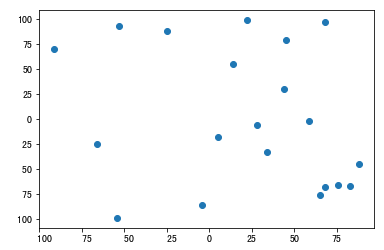

In [9]:
plt.scatter(latitudes, longitude)

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

In [14]:
chosen_p = (-50, 10)
chosen_p2 = (1, 30)
chosen_p3 = (99, 15)

In [4]:
import matplotlib.pyplot as plt

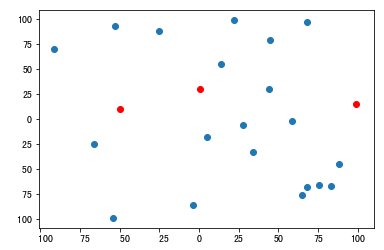

In [15]:
plt.scatter(latitudes, longitude)
plt.scatter([chosen_p[0]], [chosen_p[1]], color='r')
plt.scatter([chosen_p2[0]], [chosen_p2[1]], color='r')
plt.scatter([chosen_p3[0]], [chosen_p3[1]], color='r')

shuro